### Import Libraries

In [328]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Load data

In [329]:
input = np.array([[0,0],[0,1],[1,0],[1,1]])
output = np.array([0,1,1,1])

In [330]:
data = pd.DataFrame(input,columns=['X1','X2'])
data['output'] = pd.DataFrame(output,columns=['Y'])
df =data

In [331]:
df

,X1,X2,output
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


### Exploratory Data Analysis

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      4 non-null      int64
 1   X2      4 non-null      int64
 2   output  4 non-null      int64
dtypes: int64(3)
memory usage: 224.0 bytes


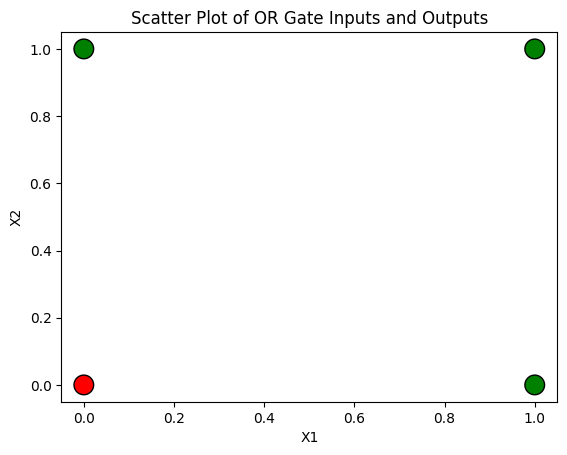

In [333]:
colors = ['red' if output == 0 else 'green' for output in df['output']]
plt.scatter(df['X1'],df['X2'],c=colors,s=200, edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of OR Gate Inputs and Outputs')

plt.show()

# Perceptron 

## Model Output
The perceptron output is given by:
$$
p = w_1 x_1 + w_2 x_2 + b
$$


## Predicted Probability
Using the sigmoid function:
$$
\hat{y} = \sigma(p) = \frac{1}{1 + e^{-p}}
$$


## Binary Cross-Entropy Loss
The Binary Cross-Entropy loss for a single instance is:
$$
\text{BCE}(y, \hat{y}) = -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$


## Gradients with Respect to Weights and Bias

1. **Gradient with Respect to Weight \( w_1 \)**:
   $$
   \frac{\partial \text{BCE}}{\partial w_1} = -(y - \hat{y}) x_1
   $$

2. **Gradient with Respect to Weight \( w_2 \)**:
   $$
   \frac{\partial \text{BCE}}{\partial w_2} = -(y - \hat{y}) x_2
   $$

3. **Gradient with Respect to Bias \( b \)**:
   $$
   \frac{\partial \text{BCE}}{\partial b} = -(y - \hat{y})
   $$

## Updating Weights and Biases
You can update your weights and bias using gradient descent as follows:

- For each weight:
  $$
  w_j := w_j - η \frac{\partial \text{BCE}}{\partial w_j}
  $$

- For bias:
  $$
  b := b - η \frac{\partial \text{BCE}}{\partial b}
  $$

**Where:**
- \( η \) is the learning rate.

In [334]:
class Perceptron:
    def __init__(self,my_weights,my_bias,learning_rate=0.5) -> None:
        self.weights = my_weights
        self.bias = my_bias
        self.learning_rate = learning_rate
        self.loss = []
    
    def activation(self,net):
        answer =1 if net > 0 else 0
        return answer
    
    def neuron(self,inputs):
        neuron_architecture = np.dot(self.weights,inputs) + self.bias
        return neuron_architecture
    
    def neuron_propagate(self,inputs):
        processing = self.neuron(inputs)
        return self.activation(processing)
    
    def dL_dw(self,x,y_actual,y_predicted):
        return -1 * np.dot(( y_actual - y_predicted), x)
        
        
    def dL_db(self,y_actual,y_predicted):
        return -1 * ( y_actual - y_predicted) 
        
        
        
    
    def training(self,inputs,output):
        total_loss = 0
        no_of_samples = inputs.shape[0]
        for inp,outp in zip(inputs.values,output.values):
            y_cap = self.neuron_propagate(inputs=inp)
            
            
            self.weights   =    [ W  - self.learning_rate * self.dL_dw(X,outp,y_cap)  for (W,X) in zip(self.weights,inp)]
            
            
            self.bias      =     self.bias - self.learning_rate * self.dL_db(outp,y_cap)
            
            y_cap = y_cap = np.clip(y_cap, 1e-10, 1 - 1e-10)
            
            loss = -1 * (outp * np.log2(y_cap) + (1 - outp) * np.log2(1 - y_cap))
            self.loss.append(loss)
            total_loss += loss
            
        return total_loss / no_of_samples
            
    def predict(self,inputs):
            return [self.neuron_propagate(inp) for inp in inputs.values]
            
        
            
    
    
        

### Initialize weights and biases (Hyperparameter-tuning)

In [335]:
InitialWeights = [0,0]
InitialBias = 0
LearningRate = 0.1

In [336]:
SLperceptron = Perceptron(InitialWeights,InitialBias,LearningRate)

### Train your Perceptron

In [337]:
loss = []
for i in range(100):
    loss.append(SLperceptron.training(df[['X1','X2']],df['output']))

### prediction

In [338]:
SLperceptron.predict(df[['X1','X2']])

[0, 1, 1, 1]

### Learning curve

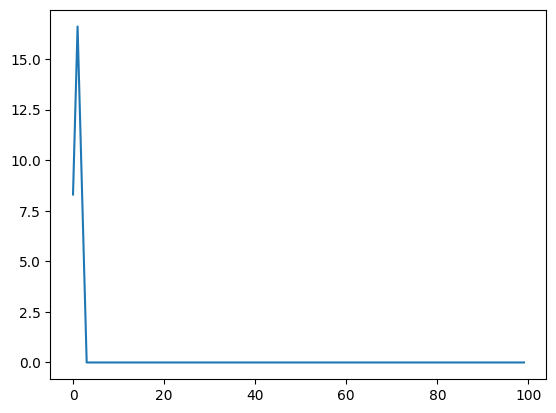

In [339]:
plt.plot(loss)